# Lineare Algebra für Data Science und absolute Beginner (II/II)
![beginner](https://upload.wikimedia.org/wikipedia/commons/f/f7/ABSOLUTE_BEGINNER.jpg "Von Mika Väisänen, CC BY-SA 3.0 de, https://commons.wikimedia.org/w/index.php?curid=38500036")

In [1]:
import numpy as np

# Matrixmultiplikation besser verstehen

Hi und schön, dass Du wieder da bist.

Nach unserem einführenden Beispiel schauen wir uns nun an, wie die Matrixmultiplikation genau funktioniert (Teil 1) und was man damit machen kann (Teil 2). Dafür versuchen wir zunächst uns ein bisschen Intuition zu verschaffen. Stell Dir vor, Du hast zwei Matrizen $A$ und $B$: 

In [2]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[5,6],
              [7,8]])

print(A+B)

[[ 6  8]
 [10 12]]


Was passiert, wenn wir diese zwei Matrizen addieren oder subtrahieren?

In [7]:
print("A+B")
print(A+B)
print("A-B")
print(A-B)

A+B
[[ 6  8]
 [10 12]]
A-B
[[-4 -4]
 [-4 -4]]


Man sieht, dass die Summe der beiden Matrizen $A$ und $B$ die Summe der einzelnen Elemente ist (bzw. die Differenz). Das ist nicht besonders spannend. Was passiert, wenn wir die beiden Matrizen miteinander multiplizieren? Jetzt ist nur die Frage: In welcher Reihenfolge? Ach egal, nehmen wir beide!

In [8]:
print("A*B")
print(A@B)
print("B*A")
print(B@A)

A*B
[[19 22]
 [43 50]]
B*A
[[23 34]
 [31 46]]


Erste Feststellung: Die Reihenfolge ist nicht egal! Die Matrixmultiplikation ist nicht kommutativ. Das heißt, dass $A \cdot B \neq B \cdot A$. 

Jetzt nehmen wir mal ein paar andere Matrizengrößen und schauen, was passiert. 

In [9]:
A = np.array([[6,3],
              [2,2],
              [1,6],
              [8,6]])

B = np.array([[8,0,0],
              [9,5,0]])

In [10]:
print("A*B")
print(A@B)

A*B
[[ 75  15   0]
 [ 34  10   0]
 [ 62  30   0]
 [118  30   0]]


Sehr schön, das scheint ja schon mal zu funktionieren. Aber was passiert, wenn wir die Matrizen vertauschen?

In [11]:
print("B*A")
print(B@A)

B*A


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

Nun erhalten wir eine Fehlermeldung! Das heißt, dass die Matrixmultiplikation so nicht durchführbar ist. Die Fehlermeldung sagt: "size 4 is different from 3". Das heißt, dass die Anzahl der Spalten der ersten Matrix gleich der Anzahl der Zeilen der zweiten Matrix sein muss. Aber warum? Schauen wir uns das mal genauer an. Die folgende Grafik zeigt die Matrixmultiplikation von $A$ und $B$:

![Matrixmultiplikation](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/1920px-Matrix_multiplication_diagram_2.svg.png "Von Inductiveload - Eigenes Werk, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=1119724")

Wenn man die Matrizen $A$ und $B$ so anordnet wie in der Grafik oben wird deutlich, dass die Anzahl der Spalten der ersten Matrix gleich der Anzahl der Zeilen der zweiten Matrix sein muss. Um z.B. den Wert im roten Kreis zu ermitteln muss ich folgendes rechnen:

$(a_{1,1}*b_{1,2})+ (a_{1,2}*b_{2,2})$

Dafür müssen die Spalten von $A$ und die Zeilen von $B$ gleich sein. Anders ist es bei den Zeilen von $A$ und den Spalten von $B$. Diese können beliebig lang sein. Daher hat die Matrixmultiplikation auch die Form $m \times n$ und $n \times p$. Das Ergebnis ist dann eine Matrix der Größe $m \times p$. In der Eregebnismatrix kommt $n$ also nicht mehr vor. Das wir für uns noch sehr nützlich werden, wenn wir uns z.B. mit der Dimensionsreduktion oder Sprachmodellen wie GPT beschäftigen.

So weit so gut! Schauen wir uns jetzt mal ein paar Spezialfälle von Matrizen an. Zunächst die Einheitsmatrix, auch Identität $I$ genannt. Diese hat auf der Hauptdiagonalen nur Einsen und sonst nur Nullen. Jetzt multiplizieren wir die Matrix $A$ mit der Einheitsmatrix $I$, um zu schauen, was mit $A$ passiert.

In [19]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

I = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

# Shortcut: I = np.eye(3)

print("A*I")
print(A@I)
print("I*A")
print(I@A)

A*I
[[1 2 3]
 [4 5 6]
 [7 8 9]]
I*A
[[1 2 3]
 [4 5 6]
 [7 8 9]]


Interessant! Die Matrix $A$ bleibt gleich. Das heißt, dass die Einheitsmatrix $I$ das sog. "neutrale Element" der Matrixmultiplikation ist. Das ist so ähnlich wie die Zahl 1 bei der Multiplikation von "Zahlen". Aber warum ist das so?

Schauen wir uns mal die erste Stelle in der Ergebnismatrix an. Diese ist die Summe der Produkte der ersten Zeile von $A$ mit der ersten Spalte von $I$. Das heißt, dass wir die erste Zeile von $A$ mit der ersten Spalte von $I$ multiplizieren. In diesem Fall ist das:

Stelle "1": $1*1 + 2*0 + 3*0 = 1$

Stelle "2": $1*0 + 2*1 + 3*0 = 2$

Stelle "4": $4*1 + 5*0 + 6*0 = 4$

usw.

Was passiert nun, wenn wir $I$ etwas manipulieren?

In [20]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

B = np.array([[0,1,0],
              [1,0,0],
              [0,0,1]])

print("A*B")
print(A@B)

A*B
[[2 1 3]
 [5 4 6]
 [8 7 9]]


Jetzt sind die ersten beiden Spalten vertauscht! Man kann die Matrix $B$ auch so lesen: 

Wenn in der __ersten__ Spalte eine "1" an der __zweiten__ Stelle steht, bedeutet das: 

"Nimm die __erste__ Spalte von $A$ und schreibe sie in die __zweite__ Spalte." 

Wenn in der __zweiten__ Spalte eine "1" an der __ersten__ Stelle steht, bedeutet das: 

"Nimm die __zweite__ Spalte von $A$ und schreibe sie in die __erste__ Spalte." 

Mit einer Matrixmultiplikation kann ich also Spalten vertauschen! Aber wie sieht es mit Zeilen aus? Hast Du eine Idee? Wir können einfach die Reihenfolge der Matrizen vertauschen und schauen, was passiert.

In [21]:
print("B*A")
print(B@A)

B*A
[[4 5 6]
 [1 2 3]
 [7 8 9]]


Zack! Und schon haben wir Zeilen vertauscht. Die Matrix $B$ können wir nun wie folgt lesen:

Wenn in der __ersten__ Zeile eine "1" an der __zweiten__ Stelle steht, bedeutet das: 

"Nimm die __erste__ Zeile von $A$ und schreibe sie in die __zweite__ Zeile." 

Wenn in der __zweiten__ Zeile eine "1" an der __ersten__ Stelle steht, bedeutet das: 

"Nimm die __zweite__ Zeile von $A$ und schreibe sie in die __erste__ Zeile." 

Jetzt machen wir mal anders weiter. Wir bauen uns nun eine sogenannte untere Dreiecksmatrix $L$ aus Einsen. Dies hat auf der Hauptdiagonalen nur Einsen und darunter ebenfalls. Alles andere ist Null. Schauen wir mal, was passiert, wenn wir $A$ mit $L$ multiplizieren.


In [24]:
L = np.array([[1,0,0],
              [1,1,0],
              [1,1,1]])

print("A*L")
print(A@L)

print("L*A")
print(L@A)

A*L
[[ 6  5  3]
 [15 11  6]
 [24 17  9]]
L*A
[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]


In [1]:
# numpy als eine Implementierung von LA
import numpy as np
from numpy import linalg as LA
# pandas zum Vergleich zur LA
import pandas as pd
# pyplot, um Grafiken anzuzeigen
import matplotlib.pyplot as plt

import sympy as sp
from sympy import Matrix, init_printing
init_printing()

In [7]:
display(sp.sqrt(8))

In [23]:
A = np.array([[1,2,3],
              [4,5,6]])

V1 = np.array([1,2,3])

print(A@V1)
# print(V1@A)


[14 32]


# Ideen
1. Eigenvektoren // google Page Rank
2. Sonderfall Identitätsmatrix
3. Verstehen, was eine Matrix tut > mit Matrix experimentieren
4. PErmutationsmatrix >> Zeilen und Spalten vertauschen
5. Inverse Matrix >> Sachen rückgängig machen.
6. Determinanten
8. Projektionsmatrizen / REgression als Matrixmultiplikation

MAtrixMultiplikation: Alles hängt irgendwie zusammen

MArkovmatrix

Graphentheorie

page rank

SVD

PCA

Sparse

S LAMBDA S-1 -Transformation

# Matrixmultiplikation besser verstehen

In [24]:
A =    np.array([[1,2,3],
                 [4,5,11],
                 [7,8,12]])

In [25]:
I = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])

In [26]:
V = np.array([1,2,3])

In [31]:
# Strg-Z
neuesI = A @ LA.inv(A)
display(Matrix(np.round(neuesI, decimals=2)))

# print(np.around(A @ LA.inv(A), decimals=2))

⎡1.0   0    0 ⎤
⎢             ⎥
⎢ 0   1.0   0 ⎥
⎢             ⎥
⎣ 0    0   1.0⎦

In [34]:
A_projection = A @ LA.inv(A.T @ A) @ A.T
print(display(Matrix(np.round(A_projection))))

⎡1.0   0    0 ⎤
⎢             ⎥
⎢ 0   1.0   0 ⎥
⎢             ⎥
⎣ 0    0   1.0⎦

None


In [ ]:




 I@A

array([[ 1,  2,  3],
       [ 4,  5, 11],
       [ 7,  8, 12]])

In [ ]:
A*I

array([[ 1,  0,  0],
       [ 0,  5,  0],
       [ 0,  0, 12]])

In [ ]:
B = np.matrix([[0,0,1],
               [1,0,0],
               [0,1,0]])

print(B)

[[0 0 1]
 [1 0 0]
 [0 1 0]]


In [ ]:
# row swap 
# row operations = left multiplication of B with A
# B means: write row 3 in row 1
B*A

matrix([[ 7,  8, 12],
        [ 1,  2,  3],
        [ 4,  5, 11]])

In [ ]:
# col swap 
# col operations = left multiplication of B with A
# B means: write col 3 in col 1
A*B

matrix([[ 2,  3,  1],
        [ 5, 11,  4],
        [ 8, 12,  7]])

In [ ]:
# C
C = I.copy()
C[1,0] = -1
C

array([[ 1,  0,  0],
       [-1,  1,  0],
       [ 0,  0,  1]])

In [ ]:
AT = A.transpose()

In [ ]:
AT

array([[ 1,  4,  7],
       [ 2,  5,  8],
       [ 3, 11, 12]])

In [ ]:
A*AT

array([[  1,   8,  21],
       [  8,  25,  88],
       [ 21,  88, 144]])

In [ ]:
AT*A

array([[  1,   8,  21],
       [  8,  25,  88],
       [ 21,  88, 144]])

In [ ]:
# SAS-Transformation

eigvals_staub
S = eigvectors_staub
SI = LA.inv(eigvectors_staub)

I = np.array([[1,0],
              [0,1]])

LAMBDA = eigvals_staub * I
LAMBDA2 = LAMBDA @ LAMBDA

S @ LAMBDA @ SI


array([[0.66, 0.32],
       [0.16, 0.66]])

array([[0.66, 0.32],
       [0.16, 0.66]])

In [ ]:
LAMBDA

array([[0.94142136, 0.        ],
       [0.        , 0.65857864]])

In [ ]:

%%timeit
S @ LAMBDA2 @ SI


3.45 µs ± 453 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%%timeit
zombifizierungmatrix_staub @ zombifizierungmatrix_staub

2.09 µs ± 296 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
A = np.array([  [1,2,3],
                [2,4,6],
                [3,4,0]])

In [34]:
print(A)
A_norm_1 = LA.norm(A, axis=1, keepdims=True)
A_norm_0 = LA.norm(A, axis=0, keepdims=True)
print(A_norm_1**2)
print(A_norm_0)
print(((A @ A.T) / (A_norm_1**2))**2)


[[1 2 3]
 [2 4 6]
 [3 4 0]]
[[14.]
 [56.]
 [25.]]
[[3.74165739 6.         6.70820393]]
[[1.         4.         0.61734694]
 [0.25       1.         0.15433673]
 [0.1936     0.7744     1.        ]]


In [75]:
A = np.array([  [1,0],
                [1,1],
                [1,2],
                [0,2]])

# LA.det(A)

[0 0 0 0] [0 0 0 0]


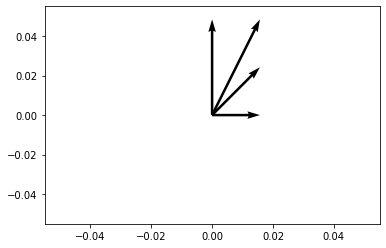

In [64]:
origin = np.zeros_like(A.T)
print(*origin)
plt.quiver(*origin, A[:,0], A[:,1], scale=7)
plt.show()

In [80]:
(A@A.T) 

array([[1, 1, 1, 0],
       [1, 2, 3, 2],
       [1, 3, 5, 4],
       [0, 2, 4, 4]])

In [82]:
LA.norm(A, axis=1, keepdims=True)@LA.norm(A, axis=0, keepdims=True)

array([[1.73205081, 3.        ],
       [2.44948974, 4.24264069],
       [3.87298335, 6.70820393],
       [3.46410162, 6.        ]])